In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ALL MODULES
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

Step 1 : Load pickled word embeddings

In [ ]:
with open('/content/drive/MyDrive/XMP Preprocessing/words.txt', 'rb') as pickle_file:
    words = pickle.load(pickle_file)

In [ ]:
with open('/content/drive/MyDrive/XMP Preprocessing/data.txt', 'rb') as pickle_file:
    second_words = pickle.load(pickle_file)

In [ ]:
# Load ratings
with open('/content/drive/MyDrive/XMP Preprocessing/ratings.txt', 'rb') as pickle_file:
    ratings = pickle.load(pickle_file)

In [ ]:
with open('/content/drive/MyDrive/XMP Preprocessing/dataframe_second.txt', 'rb') as pickle_file:
    dataframe_second = pickle.load(pickle_file)

In [ ]:
word_vectors  = list(words.wv.vocab)

In [ ]:
print(word_vectors)

['southeast', 'asian', 'american', 'have', 'received', 'final', 'order', 'of', 'removal', 'indian', 'asylum', 'seeker', 'were', 'arrested', 'jerry', 'vattamala', 'on', 'how', 'to', 'combat', 'voter', 'suppression', 'the', 'best', 'way', 'is', 'educate', 'ourselves', 'become', 'a', 'poll', 'an', 'org', 'focused', 'addressing', 'bullying', 'in', 'aapi', 'community', 'holding', 'their', 'second', 'covid', 'conversation', 'emphasizes', 'that', 'president', 'trump', 'wa', 'clear', 'he', 'wanted', 'ban', 'muslim', 'our', 'master', 'ceremony', 'kick', 'off', 'tonight', 's', 'courageawards', 'this', 'organization', 'we', 'need', 'now', 'more', 'than', 'ever', 'walk', 'talk', 'courage', 'award', 'honor', 'living', 'legend', 'and', 'icon', 'are', 'partnering', 'bring', 'you', 't', 'new', 'video', 'series', 'spreading', 'good', 'news', 'first', 'episode', 'feature', 'hmong', 'americ', 'highlight', 'increasing', 'sophistication', 'invasiveness', 'marking', 'up', 'nobanact', 'morning', 'which', 'wo

In [ ]:
print(ratings.head(10))

  Average Rating
0              0
1              1
2              0
3              0
4            0.5
5              3
6              0
7              1
8    1.333333333
9              0


In [ ]:
# Add 3 to all averages to make them positive
list_of_ratings = ratings['Average Rating'].tolist()

In [ ]:
print(list_of_ratings[:9])

['0', '1', '0', '0', '0.5', '3', '0', '1', '1.333333333']


In [ ]:
import math
adjusted_ratings = []
for j in range(len(list_of_ratings)):
  value = round(float(list_of_ratings[j]))
  if value == 0:
    adjusted_ratings.append(0)
  elif value > 0:
    adjusted_ratings.append(1)
  else:
    adjusted_ratings.append(-1)

for j in range(len(adjusted_ratings)):
  adjusted_ratings[j] = adjusted_ratings[j]+1

In [ ]:
import math
for j in range(len(list_of_ratings)):
  list_of_ratings[j] = float(list_of_ratings[j])+3
  list_of_ratings[j] = round(list_of_ratings[j])


In [ ]:
ratings = pd.DataFrame(list_of_ratings, columns=['Average Rating'])

In [ ]:
ad_ratings = pd.DataFrame(adjusted_ratings, columns=['Average Rating'])

In [ ]:
print(ratings.head(10))

   Average Rating
0               3
1               4
2               3
3               3
4               4
5               6
6               3
7               4
8               4
9               3


In [ ]:
print(ad_ratings.head(10))

   Average Rating
0               1
1               2
2               1
3               1
4               1
5               2
6               1
7               2
8               2
9               1


In [ ]:
second_word_vectors = list(second_words.wv.vocab)

In [ ]:
print(word_vectors[:5])

['southeast', 'asian', 'american', 'have', 'received']


In [ ]:
#vector for specific word in m1
print(words["american"])

[ 0.36431527 -0.30692557  1.1464161   1.0168204  -0.19173142 -0.03947559
 -0.42104095 -0.41057202  1.1379406  -0.47516716 -0.15986317 -0.3817503
 -0.90165085  0.5948663   0.19441298 -1.0995516  -0.2584372   0.70970935
  0.2299946  -0.38314328  0.55146974 -0.48004436  0.38951653  1.5945992
  1.316993   -1.5785024   0.22559503 -0.00510164  0.6049516   0.26104498
  0.5350609   0.10951906  0.5813537   0.3518457  -0.49613312  0.35917526
 -0.62402505  0.26203138 -1.9785721   0.6172808   0.13845032 -1.5060234
  1.1093132  -0.99910367  1.2361119   0.56732976  0.13765898 -0.5793015
  0.13760199  0.41560525  0.06818605 -0.7258449   0.05241426  0.13679802
  0.22410594 -0.5511061   2.1164286  -0.21390201 -0.7470532   0.3431311
 -0.6618767  -0.26752985  0.5448033   0.9512042  -0.13319045  0.5343022
 -0.42748    -0.05452832 -0.15144755  0.89941734 -1.0977684  -0.41464776
  0.7194327  -1.4602439   0.9531568  -0.09996463  0.69846463 -0.67199993
  2.3314292  -1.6861665  -1.0906011   0.33084008 -0.82622

<ipython-input-129-bcd93eb65d4a>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(words["american"])


In [ ]:
print(second_word_vectors[:5])

['jerry', 'vattamala', 'on', 'how', 'to']


In [ ]:
# Generate word vectors
vectors = words[words.wv.vocab]

<ipython-input-131-01971728e2b7>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = words[words.wv.vocab]


In [ ]:
second_vectors = second_words[second_words.wv.vocab]

<ipython-input-132-6c963f0db766>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  second_vectors = second_words[second_words.wv.vocab]


In [ ]:
print(len(second_vectors))
print(len(vectors))

11004
26621


In [ ]:
#dimension of each word vector
print(len(second_vectors[0]))

100


In [ ]:
df_2 = dataframe_second['content'].values.tolist()

In [ ]:
print(df_2[0])

['jerry', 'vattamala', 'on', 'how', 'to', 'combat', 'voter', 'suppression', 'the', 'best', 'way', 'is', 'to', 'educate', 'ourselves', 'become', 'a', 'poll']


In [ ]:
# eliminates null row vectors

########### delete!! ##################
def nullFilter(x):
  return len(x)

In [ ]:
import numpy as np
sentence_embeddings = []
for j in range(len(df_2)):
  row = []
  for word in df_2[j]:
    vector = second_words[word]
    row.append(vector)
  if len(row) == 0:
    list_of_ratings.pop(j)
    adjusted_ratings.pop(j)
  else:
    avg= np.mean(row, axis=0, dtype=np.float64)
    sentence_embeddings.append(avg)

<ipython-input-138-ebaef033030a>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = second_words[word]


In [ ]:
sentence_embeddings = np.array(sentence_embeddings)
print(sentence_embeddings.shape)

(7379, 100)


In [ ]:
print(sentence_embeddings[0])

[-1.57190590e-02  6.39358248e-02 -1.07723141e-01  6.35117179e-02
  5.09547578e-01 -6.44416712e-01 -4.09417271e-01  2.06307956e-01
  9.03889485e-02  5.87935788e-01  2.74546831e-01  6.83002377e-02
 -2.39707498e-01  3.33394423e-01  3.42361241e-01  8.00746728e-02
 -5.45453881e-01  3.06063930e-01 -3.31406933e-01 -4.75052723e-01
  1.89775732e-01  3.29145366e-01  2.09170099e-01  6.16668622e-01
  4.18550654e-01 -3.66208344e-01  7.70394535e-02  3.04419455e-01
  2.55716103e-01  9.94694725e-01  5.57533559e-02  3.23336503e-01
  5.47179642e-01  4.63491791e-01 -1.86352357e-01 -3.43819515e-01
 -2.70000844e-01  2.35657324e-01  2.36168696e-01 -1.55462506e-01
  1.60045879e-02 -1.04058866e-02 -9.73440738e-01 -3.09877374e-03
  1.42643296e-01  3.19189616e-01  1.21458280e-01 -3.71793929e-01
 -4.08287310e-01 -5.59311277e-01  1.31259259e-01 -5.51750260e-01
 -7.46220901e-02  4.37784289e-01  7.21844553e-02 -4.24392750e-02
 -3.28305349e-02  1.25646570e-01 -7.89046112e-02  3.65518207e-01
  2.72609074e-01  3.86352

In [ ]:
print(len(sentence_embeddings))
print(len(list_of_ratings))
print(len(adjusted_ratings))

7379
7379
7379


In [ ]:
print(vectors[0][:10])

[ 0.21447395  0.0749198   0.15211219  0.19572447  0.01146604 -0.00938125
 -0.09517094 -0.18752871  0.20009087 -0.12412427]


In [ ]:
print(second_vectors[0][:10])

[-8.3430437e-05  7.8070532e-03 -1.1608206e-02  7.0547005e-03
  5.6482598e-02 -6.2926307e-02 -4.2054132e-02  2.3099747e-02
  1.2907508e-02  5.8969736e-02]


**Step 2 - Implement K-Means Clustering Algorithm**


In [ ]:
preprocessing.StandardScaler().fit_transform(vectors)
preprocessing.StandardScaler().fit_transform(second_vectors)

# fitting kmeans for first dataset
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(vectors)


# Question : fit or fit_predict?

In [ ]:
# do not correlate every single sentence is a word embedding. instead we should be consider the vectors for only particular tweets.
# fitting kmeans to second dataset

kmeans_2 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
second_Y_kmeans = kmeans_2.fit_predict(sentence_embeddings)

In [ ]:
# trying to cluster with 3
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
adjusted_kmeans = kmeans_3.fit_predict(sentence_embeddings)

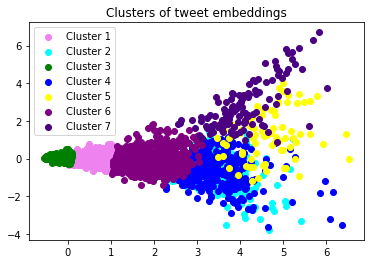

In [ ]:
# Visualising the first clusters
pca = PCA(2)
result = pca.fit_transform(vectors)

plt.scatter(result[Y_kmeans==0, 0], result[Y_kmeans==0, 1], c='violet', label= 'Cluster 1')
plt.scatter(result[Y_kmeans==1, 0], result[Y_kmeans==1, 1], c='cyan', label= 'Cluster 2')
plt.scatter(result[Y_kmeans==2, 0], result[Y_kmeans==2, 1], c='green', label= 'Cluster 3')
plt.scatter(result[Y_kmeans==3, 0], result[Y_kmeans==3, 1],  c='blue', label= 'Cluster 4')
plt.scatter(result[Y_kmeans==4, 0], result[Y_kmeans==4, 1],  c='yellow', label= 'Cluster 5')
plt.scatter(result[Y_kmeans==5, 0], result[Y_kmeans==5, 1],  c='purple', label= 'Cluster 6')
plt.scatter(result[Y_kmeans==6, 0], result[Y_kmeans==6, 1],  c='indigo', label= 'Cluster 7')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweet embeddings')
plt.legend()

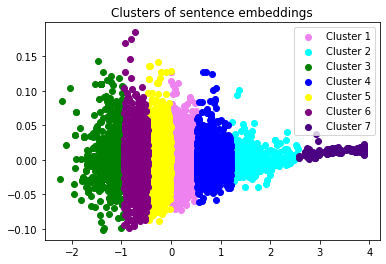

In [ ]:
# Visualising the second clusters
pca = PCA(2)
result = pca.fit_transform(sentence_embeddings)

plt.scatter(result[second_Y_kmeans==0, 0], result[second_Y_kmeans==0, 1], c='violet', label= 'Cluster 1')
plt.scatter(result[second_Y_kmeans==1, 0], result[second_Y_kmeans==1, 1], c='cyan', label= 'Cluster 2')
plt.scatter(result[second_Y_kmeans==2, 0], result[second_Y_kmeans==2, 1], c='green', label= 'Cluster 3')
plt.scatter(result[second_Y_kmeans==3, 0], result[second_Y_kmeans==3, 1],  c='blue', label= 'Cluster 4')
plt.scatter(result[second_Y_kmeans==4, 0], result[second_Y_kmeans==4, 1],  c='yellow', label= 'Cluster 5')
plt.scatter(result[second_Y_kmeans==5, 0], result[second_Y_kmeans==5, 1],  c='purple', label= 'Cluster 6')
plt.scatter(result[second_Y_kmeans==6, 0], result[second_Y_kmeans==6, 1],  c='indigo', label= 'Cluster 7')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of sentence embeddings')
plt.legend()

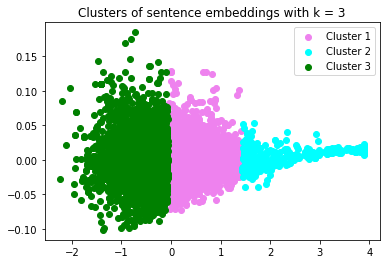

In [ ]:
# Visualising the third clusters
pca = PCA(2)
result = pca.fit_transform(sentence_embeddings)

plt.scatter(result[adjusted_kmeans==0, 0], result[adjusted_kmeans==0, 1], c='violet', label= 'Cluster 1')
plt.scatter(result[adjusted_kmeans==1, 0], result[adjusted_kmeans==1, 1], c='cyan', label= 'Cluster 2')
plt.scatter(result[adjusted_kmeans==2, 0], result[adjusted_kmeans==2, 1], c='green', label= 'Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of sentence embeddings with k = 3')
plt.legend()

In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score
# This is for the second dataset
print(f'Silhouette Score(n=7): {silhouette_score(sentence_embeddings, kmeans_2.labels_)}')
print(f'Silhouette Score(n=7): {silhouette_score(vectors, kmeans.labels_)}')

Silhouette Score(n=7): 0.49450368650256776
Silhouette Score(n=7): 0.6557074189186096


In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score
# This is for the second dataset
print(f'Silhouette Score(n=3): {silhouette_score(sentence_embeddings, kmeans_3.labels_)}')

Silhouette Score(n=3): 0.5399344891284389


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
tweet = "I love indians they are so hard working and great amazing cute kind fine good people"

In [ ]:
with open('/content/drive/MyDrive/XMP Preprocessing/data.txt', 'rb') as pickle_file:
    second_model = pickle.load(pickle_file)

In [ ]:
#testing model on one specific tweet
res = []
for word in tweet.split():
  try:
    res.append(second_words[word])
  except:
    print("Key Error: Vector for this word not found")

avg= np.mean(res, axis=0, dtype=np.double)
print(kmeans_2.predict([avg]))

Key Error: Vector for this word not found
Key Error: Vector for this word not found
[3]


<ipython-input-38-245aa67872a9>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  res.append(second_words[word])


In [ ]:
def avg_row_vector(tweet):
  res = []
  for word in tweet:
    try:
      res.append(second_words[word])
    except:
      print("Key Error: Vector for this word not found")

  avg= np.mean(res, axis=0, dtype=np.double)

  return avg

In [ ]:
# ALL MODULES
import pandas as pd
import nltk as nl 
import re
!pip install contractions
!pip install emoji --upgrade
from emoji import demojize
import contractions
from typing import List

files =  ['/content/drive/MyDrive/XMP Preprocessing/Tweets With 1 or More Raters.xlsx - Sheet1.csv'] 

df = pd.concat(
    map(pd.read_csv, files), ignore_index=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.1-py3-none-any.whl (287 kB)
  Using cached pyahocorasick-1.4.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (110 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=ea21bd1b2b97ba91f664b5235f820ee46a008b6969060dc3486291560e1e2671
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (9,19,24,26,34,48,152,169,171,172,180) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


In [ ]:
df.drop(df[df['Average Rating'] == '#DIV/0!'].index, inplace = True)

df_ratings = df['Average Rating']
df_ratings = df_ratings.to_frame()

df.fillna(0, inplace=True)

df = df['content']
df = df.to_frame()

In [ ]:
def preprocess_tweet(tweet: str) -> str:
    """
    Performs Twitter-specific pre-processing steps.
    We do not remove punctuation right now because that would remove hashtags.
    """

    space_regex = r'\s+'
    url_regex = r"\w+:\/\/\S+"
    space_regex = r'\s+'
    number_regex = r'\d+'
    hashtag_regex = r'\#\w+\s*'
    # handle_regex = r"@[\w\d_]+"
    handle_regex = r"@[\S]+" # matches all characters except whitespace
    
    
    # replace long whitespace with single space
    cleaned_tweet = re.sub(space_regex, ' ', tweet)
    cleaned_tweet = re.sub(url_regex, '', cleaned_tweet)  # remove urls
    # remove user handles
    cleaned_tweet = re.sub(handle_regex, '', cleaned_tweet)
    cleaned_tweet = re.sub(number_regex, '', cleaned_tweet)  # remove numbers
    cleaned_tweet = demojize(cleaned_tweet)       # demojize

    # remove hashtags
    cleaned_tweet = re.sub(hashtag_regex, '', cleaned_tweet)

    cleaned_tweet = contractions.fix(cleaned_tweet).lower()
    return cleaned_tweet

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
for index, row in df.iterrows():
  df.at[index,'content']=preprocess_tweet(row["content"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
print(df.head(30))

                                              content
0   . jerry vattamala on how to combat voter suppr...
1   . to  why are you here [at ] instead of pres. ...
2   . says he will give small businesses a restart...
3   . is joining  commitment march this friday to ...
4   . introduced a resolution to urge congress to ...
5   . we urge you to protect immigrants and refuge...
6   "a suppressed leads to many of the problems we...
7   "as there is been a growth of aapis running fo...
8   "great challenges produce great leaders. we ha...
9   "i stand up to vote because of those that died...
10  "i vote because i recognize that voting is a p...
11  "i am marching for community control over the ...
12  "i am voting because it is the most direct way...
13  "i am marching to show gratitude to my parents...
14  "in the spirit of civil rights leaders that wa...
15  "it is time we had a conversation with america...
16  "kung flu." 'chinese virus." anti-asian rhetor...
17  "my brother’s death taug

In [ ]:
def tokenize(tweet: str, method: str = "tweet") -> List[str]:
    """
    Returns tokens of a tweet, tokenized using a specified method, with all the tokens stemmed.
    tweet is a string
    method is a string
    """

    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import TweetTokenizer, word_tokenize
    from nltk.stem import PorterStemmer
    import emoji
    import string
      
    lemmatizer = WordNetLemmatizer()

    tokens = []
    if method == "tweet":
        tweet_tokenizer = TweetTokenizer()
        tokens = tweet_tokenizer.tokenize(tweet)
    elif method == "word":
        tokens = word_tokenize(tweet)

    # remove tokens that are just punctuation

    # ***TODO: append other excluded ASCII values to string.punctuation***
    punctuation_list = [punct for punct in string.punctuation]
    punctuation_list.append(['’', '“'])
    tokens_punctuation_removed = [
        t for t in tokens if t not in punctuation_list]
        
    # remove emojis
    # tokens_emojis_removed = [
    #     t for t in tokens_punctuation_removed if t not in emoji.UNICODE_EMOJI]

    # uncomment to perform stemming
    # return [PorterStemmer().stem(t) for t in tokens_punctuation_removed]

    return [lemmatizer.lemmatize(w) for w in tokens_punctuation_removed]

In [ ]:
for index, row in df.iterrows():
  df.at[index,'content']=tokenize(row["content"])

In [ ]:
print(df.head(20))

                                              content
0   [jerry, vattamala, on, how, to, combat, voter,...
1   [to, why, are, you, here, at, instead, of, pre...
2   [say, he, will, give, small, business, a, rest...
3   [is, joining, commitment, march, this, friday,...
4   [introduced, a, resolution, to, urge, congress...
5   [we, urge, you, to, protect, immigrant, and, r...
6   [a, suppressed, lead, to, many, of, the, probl...
7   [a, there, is, been, a, growth, of, aapis, run...
8   [great, challenge, produce, great, leader, we,...
9   [i, stand, up, to, vote, because, of, those, t...
10  [i, vote, because, i, recognize, that, voting,...
11  [i, am, marching, for, community, control, ove...
12  [i, am, voting, because, it, is, the, most, di...
13  [i, am, marching, to, show, gratitude, to, my,...
14  [in, the, spirit, of, civil, right, leader, th...
15  [it, is, time, we, had, a, conversation, with,...
16  [kung, flu, chinese, virus, anti-asian, rhetor...
17  [my, brother, ’, s, deat

In [ ]:
def remove_apostrophe(tweet):
  special_character_regex = r'[^\w ]'
  cleaned = ''
  result = []
  if tweet:
    for word in tweet:
      cleaned =  re.sub(special_character_regex, '', word)
      # if cleaned == 's':
      #   cleaned = ''
      if len(cleaned) != 0:
        result.append(cleaned)
    return result


In [ ]:
for index, row in df.iterrows():
  df.at[index,'content']=remove_apostrophe(row["content"])

In [ ]:
print(df.head(10))

                                             content
0  [jerry, vattamala, on, how, to, combat, voter,...
1  [to, why, are, you, here, at, instead, of, pre...
2  [say, he, will, give, small, business, a, rest...
3  [is, joining, commitment, march, this, friday,...
4  [introduced, a, resolution, to, urge, congress...
5  [we, urge, you, to, protect, immigrant, and, r...
6  [a, suppressed, lead, to, many, of, the, probl...
7  [a, there, is, been, a, growth, of, aapis, run...
8  [great, challenge, produce, great, leader, we,...
9  [i, stand, up, to, vote, because, of, those, t...


In [ ]:
# Remove Null values
df.fillna("", inplace = True)

In [ ]:
df_to_list = df['content'].values.tolist()
print(df_to_list[0:2])


[['jerry', 'vattamala', 'on', 'how', 'to', 'combat', 'voter', 'suppression', 'the', 'best', 'way', 'is', 'to', 'educate', 'ourselves', 'become', 'a', 'poll'], ['to', 'why', 'are', 'you', 'here', 'at', 'instead', 'of', 'pres', 'trump', 'gov', 'say', 'it', 'is', 'beca']]


In [ ]:
predicted_ratings = []

for i in range(len(df_to_list)):
  avg = avg_row_vector(df_to_list[i])
# print(predicted_ratings[0])  


<ipython-input-203-1709dd6d6668>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  res.append(second_words[word])
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
positive_ratings=[]
for x in list_of_ratings:
  x = x-3
  if (x>0):
    positive_ratings.append(1)
  elif (x<0):
    positive_ratings.append(-1)
  else:
    positive_ratings.append(0)

positive_labels=[]
for x in kmeans_2.labels_:
  x=x-3
  if (x>0):
    positive_labels.append(1)
  elif (x<0):
    positive_labels.append(-1)
  else:
    positive_labels.append(0)


In [ ]:
print("ConfusionMatrix", confusion_matrix(list_of_ratings, kmeans_2.labels_))

ConfusionMatrix [[ 49   5  16  20  74  31   0]
 [124   9  26  72 146  96   0]
 [100  11  24  56 106  67   1]
 [989 266 266 684 986 630 119]
 [176  21  92  76 229 211   5]
 [279  29 194 141 431 327   2]
 [ 48   2  27  17  52  47   0]]


In [ ]:
print("ConfusionMatrix", confusion_matrix(adjusted_ratings, kmeans_3.labels_))

ConfusionMatrix [[ 453   18  533]
 [1927  288 1827]
 [ 791   41 1501]]


In [ ]:
dict_arr = [{0: 0, 1 : 1, 2: 2}, {0: 0, 1: 2, 2: 1}, {0: 1, 1: 2, 2: 0}, {0: 1, 1 : 0, 2: 2}, {0: 2, 1 : 0, 2: 1}, {0: 2, 1 : 1, 2: 0} ]

In [ ]:
for k in range(len(dict_arr)):
  pred_ratings = []
  for j in range(len(kmeans_3.labels_)):
    pred_ratings.append(dict_arr[k][kmeans_3.labels_[j]])
  print(f'Classification report for permutation ${dict_arr[k]}')
  print(classification_report(adjusted_ratings, pred_ratings))
  print('-----------------------------------------------------')

Classification report for permutation ${0: 0, 1: 1, 2: 2}
              precision    recall  f1-score   support

           0       0.14      0.45      0.22      1004
           1       0.83      0.07      0.13      4042
           2       0.39      0.64      0.48      2333

    accuracy                           0.30      7379
   macro avg       0.45      0.39      0.28      7379
weighted avg       0.60      0.30      0.25      7379

-----------------------------------------------------
Classification report for permutation ${0: 0, 1: 2, 2: 1}
              precision    recall  f1-score   support

           0       0.14      0.45      0.22      1004
           1       0.47      0.45      0.46      4042
           2       0.12      0.02      0.03      2333

    accuracy                           0.31      7379
   macro avg       0.24      0.31      0.24      7379
weighted avg       0.32      0.31      0.29      7379

-----------------------------------------------------
Classification

In [ ]:
print(classification_report(adjusted_ratings, kmeans_3.labels_))

              precision    recall  f1-score   support

           0       0.14      0.45      0.22      1004
           1       0.83      0.07      0.13      4042
           2       0.39      0.64      0.48      2333

    accuracy                           0.30      7379
   macro avg       0.45      0.39      0.28      7379
weighted avg       0.60      0.30      0.25      7379



In [ ]:
print(classification_report(list_of_ratings, kmeans_2.labels_))

              precision    recall  f1-score   support

           0       0.03      0.25      0.05       195
           1       0.03      0.02      0.02       473
           2       0.04      0.07      0.05       365
           3       0.64      0.17      0.27      3940
           4       0.11      0.28      0.16       810
           5       0.23      0.23      0.23      1403
           6       0.00      0.00      0.00       193

    accuracy                           0.18      7379
   macro avg       0.15      0.15      0.11      7379
weighted avg       0.40      0.18      0.21      7379



word = word2vec model

word_vectors  = list(words.wv.vocab) -- loopingthrough, putting all the words into a 
looking up each word in the model for the vector, putin vectors (2d array) 

word = model
vocab - gives you the actual vector



next steps: 
tune hyperparameters  (parameters about your model) -- 
-- take example tweets, feed into model, 
-- use tagged data, 
feed the tweets in, examine the accuracy
construct validation set and test set
